In [1]:
test_dir='D:\MedNIST\Medical\Medical_test'
train_dir='D:\MedNIST\Medical\Medical_train'

In [2]:
import os
import numpy as np
import pandas as pd
import random, datetime, os, shutil, math

In [3]:
def prep_test_data(med, train_dir, test_dir):
    pop = os.listdir(train_dir+'/'+med)
    test_data=random.sample(pop, 2000)
 #print(test_data)
    for f in test_data:
        shutil.copy(train_dir+'/'+med+'/'+f, test_dir+'/'+med+'/')

In [4]:
for medi in os.listdir(train_dir):
    prep_test_data(medi, train_dir, test_dir)

In [5]:
#for train
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 6
[(0, 'AbdomenCT'), (1, 'BreastMRI'), (2, 'ChestCT'), (3, 'CXR'), (4, 'Hand'), (5, 'HeadCT')]


In [6]:
#for test
target_classes = os.listdir(test_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 6
[(0, 'AbdomenCT'), (1, 'BreastMRI'), (2, 'ChestCT'), (3, 'CXR'), (4, 'Hand'), (5, 'HeadCT')]


In [7]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, dir))) for dir in os.listdir(train_dir)]
testing_set_distribution = [len(os.listdir(os.path.join(test_dir, dir))) for dir in os.listdir(test_dir)]


In [8]:
def show_mri(med):
    num = len(med)
    if num == 0:
        return None
    rows = int(math.sqrt(num))
    cols = (num+1)//rows
    f, axs = plt.subplots(rows, cols)
    fig = 0
    for b in med:
        img = image.load_img(b)
        row = fig // cols
        col = fig % cols
        axs[row, col].imshow(img)
        fig += 1
    plt.show()

In [9]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

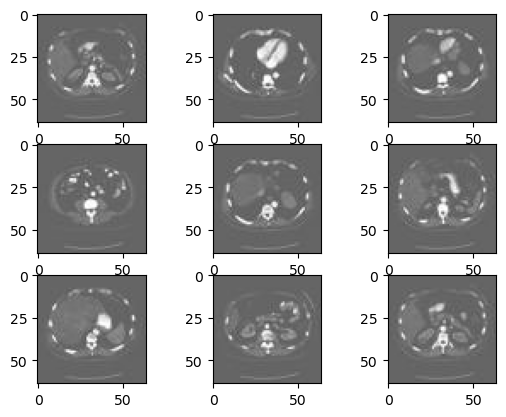

In [10]:
dir_name = os.path.join(train_dir,"AbdomenCT")
all_images = [os.path.join(dir_name, fname) for fname inos.listdir(dir_name)]
show_mri(all_images[:9])

In [11]:
image_size = (32, 32, 3)
datagen=ImageDataGenerator(rescale = 1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 )

In [12]:
training_set=datagen.flow_from_directory(train_dir,
 target_size=image_size[:2],
 batch_size=32,
class_mode='categorical',
 shuffle=False
#color_mode='rgb'
)


Found 58954 images belonging to 6 classes.


In [18]:
validation_set=datagen.flow_from_directory(test_dir,
 target_size=image_size[:2],
 batch_size=32,
 class_mode='categorical',
 shuffle=False
)

Found 21469 images belonging to 6 classes.


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [14]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=7)
filepath = "modelMedicalMNIST.h5"
ckpt = ModelCheckpoint(filepath, monitor='acc', verbose=1,
save_best_only=True, mode='max')
rlp = ReduceLROnPlateau(monitor='acc', patience=3, verbose=1)


In [15]:
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(64, (5, 5), input_shape=image_size,
    activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation = 'softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])
    return classifier

In [16]:
neuralnetwork_cnn = cnn(image_size, num_classes)
neuralnetwork_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 6)                 4

In [23]:
history = neuralnetwork_cnn.fit_generator(
    generator=training_set, validation_data=validation_set,
    callbacks=[es, ckpt, rlp], epochs = 5,)

Epoch 1/5
   1/1843 [..............................] - ETA: 2:24 - loss: 0.2943 - acc: 0.9375

C:\Users\abodk222\AppData\Local\Temp\ipykernel_18220\1689000291.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = neuralnetwork_cnn.fit_generator(


1842/1843 [============================>.] - ETA: 0s - loss: 0.0383 - acc: 0.9906
Epoch 1: acc improved from -inf to 0.99062, saving model to modelMedicalMNIST.h5
1843/1843 [==============================] - 127s 69ms/step - loss: 0.0383 - acc: 0.9906 - val_loss: 0.0285 - val_acc: 0.9923 - lr: 0.0010
Epoch 2/5
1842/1843 [============================>.] - ETA: 0s - loss: 0.0326 - acc: 0.9919
Epoch 2: acc improved from 0.99062 to 0.99186, saving model to modelMedicalMNIST.h5
1843/1843 [==============================] - 116s 63ms/step - loss: 0.0325 - acc: 0.9919 - val_loss: 0.0199 - val_acc: 0.9957 - lr: 0.0010
Epoch 3/5
1843/1843 [==============================] - ETA: 0s - loss: 0.0176 - acc: 0.9953
Epoch 3: acc improved from 0.99186 to 0.99528, saving model to modelMedicalMNIST.h5
1843/1843 [==============================] - 116s 63ms/step - loss: 0.0176 - acc: 0.9953 - val_loss: 0.0109 - val_acc: 0.9972 - lr: 0.0010
Epoch 4/5
1842/1843 [============================>.] - ETA: 0s - los

<Axes: >

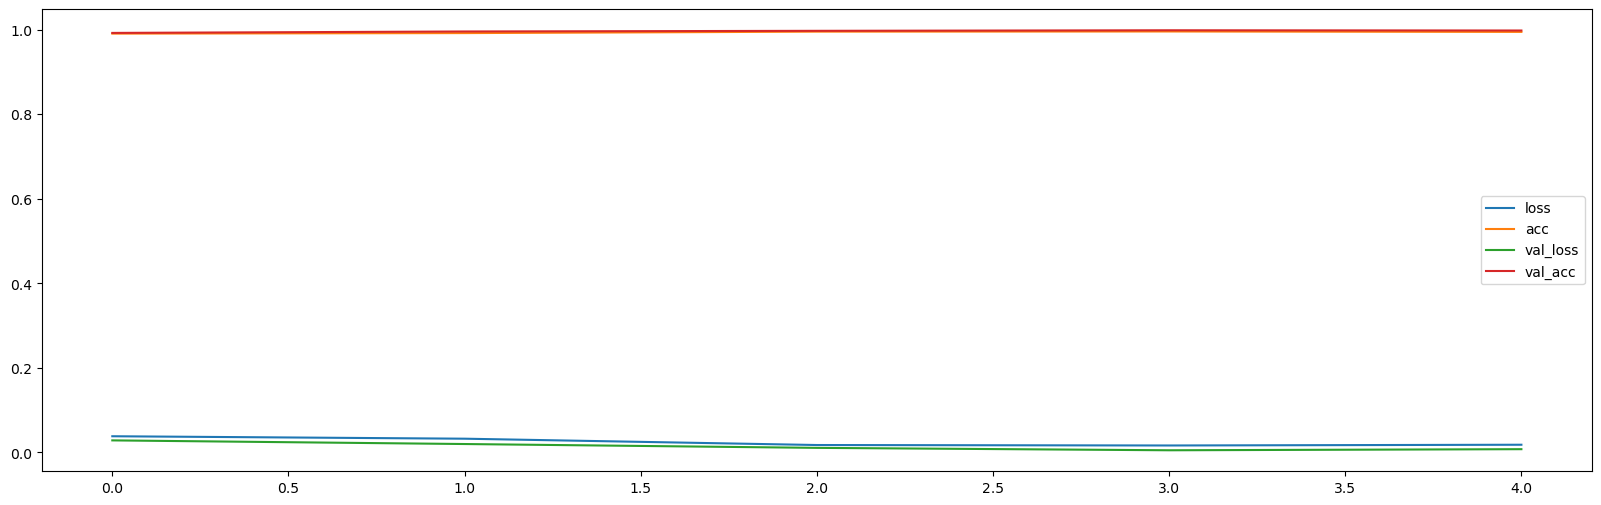

In [24]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history).iloc[:, :-1].plot(ax=ax)

In [38]:
batch_size=32
pred=neuralnetwork_cnn.predict_generator(validation_set,steps=306/batch_size)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


C:\Users\abodk222\AppData\Local\Temp\ipykernel_18220\1536474134.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=neuralnetwork_cnn.predict_generator(validation_set,steps=306/batch_size)


In [39]:
filenames=validation_set.filenames[0]
results=pd.DataFrame({"Filename":filenames,
 "Predictions":predictions})

In [40]:
display(results.head(50))

,Filename,Predictions
0,AbdomenCT\000001.jpeg,AbdomenCT
1,AbdomenCT\000001.jpeg,AbdomenCT
2,AbdomenCT\000001.jpeg,AbdomenCT
3,AbdomenCT\000001.jpeg,AbdomenCT
4,AbdomenCT\000001.jpeg,AbdomenCT
5,AbdomenCT\000001.jpeg,AbdomenCT
6,AbdomenCT\000001.jpeg,AbdomenCT
7,AbdomenCT\000001.jpeg,AbdomenCT
8,AbdomenCT\000001.jpeg,AbdomenCT
9,AbdomenCT\000001.jpeg,AbdomenCT
